# LatticeMaze Demo

This notebook contains a tutorial for [LatticeMaze](../maze_dataset/generation/latticemaze.py), the central maze object in the `maze_dataset` library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from muutils.nbutils.configure_notebook import configure_notebook

from maze_dataset.generation import LatticeMazeGenerators
from maze_dataset.maze import LatticeMaze, TargetedLatticeMaze, SolvedMaze
from maze_dataset.plotting import MazePlot

%matplotlib inline
configure_notebook(seed=42, dark_mode=True)

c:\Users\mivan\AppData\Local\pypoetry\Cache\virtualenvs\maze-dataset-K69OfPxp-py3.11\Lib\site-packages\muutils\nbutils\configure_notebook.py:10: UserWarning: Plotly not installed. Plotly plots will not be available.
  warnings.warn("Plotly not installed. Plotly plots will not be available.")


device(type='cpu')

## Maze representation

The maze can be thought of as a grid of nodes, where an edge between nodes represents a path, and the lack of an edge represents a wall.

The following generates a 4x4 maze using depth-first search.

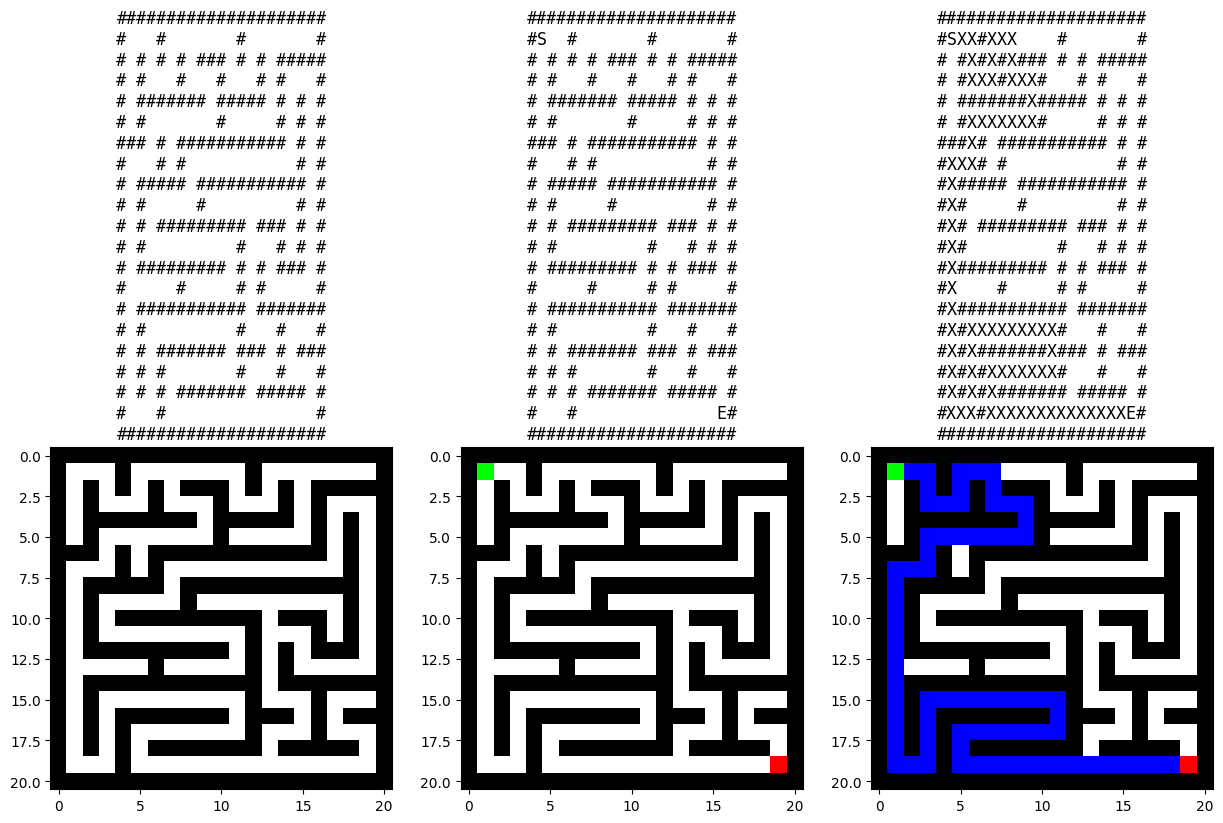

In [2]:
N: int = 10

maze = LatticeMazeGenerators.gen_dfs(np.array([N, N]))
tgt_maze: TargetedLatticeMaze = TargetedLatticeMaze.from_lattice_maze(
    maze, (0, 0), (N - 1, N - 1)
)
solved_maze: SolvedMaze = SolvedMaze.from_targeted_lattice_maze(tgt_maze)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for ax_i, temp_maze in zip(ax, [maze, tgt_maze, solved_maze]):
    ax_i.set_title(temp_maze.as_ascii(), fontfamily="monospace")
    ax_i.imshow(temp_maze.as_pixels())

    assert temp_maze == temp_maze.__class__.from_pixels(temp_maze.as_pixels())
    assert temp_maze == temp_maze.__class__.from_ascii(temp_maze.as_ascii())

plt.show()

### Connection List
In the above cell, we can see the canonical representation of the maze, the *connection list*.  To understand this representation, consider the following connection list for a 2x2 maze.
```
[
    [ # down
        [F T],
        [F F]
    ],
    [ # right
        [T F],
        [T F]
    ]
]
```

The two matrices in the connection list represent the *downward* and *rightward* connections, respectively. It tells us whether a given node has a connection in that direction.
```
down:  N  N     right:  N - N
          |           
       N  N             N - N
```

Note that the bottom row connections going down, and the right-hand column connections going right, will always be False.

We can superimpose the downward and rightward connections to visualize the maze:
```
N - N
    |
N - N
```

---

Using the same method, we can interpret the connection list for the original maze:


In [3]:
maze.connection_list

array([[[ True,  True,  True,  True, False,  True,  True,  True, False,
         False],
        [ True, False, False, False,  True, False, False,  True,  True,
          True],
        [False,  True,  True, False, False, False, False, False,  True,
          True],
        [ True, False, False,  True, False, False, False, False, False,
          True],
        [ True,  True, False, False, False, False,  True, False,  True,
          True],
        [ True, False, False, False, False,  True,  True,  True, False,
          True],
        [ True, False, False, False, False, False,  True, False, False,
         False],
        [ True,  True, False, False, False,  True, False,  True,  True,
         False],
        [ True,  True,  True, False, False, False,  True, False, False,
          True],
        [False, False, False, False, False, False, False, False, False,
         False]],

       [[ True, False,  True,  True,  True, False,  True,  True,  True,
         False],
        [False,  Tr

```
N   N - N - N
|           |
N - N - N - N
            |
N - N   N - N
|       | 
N - N - N - N
```

### Adjacency list

Another common maze representation structure is an adjacency list, which is literally a list of every pair of adjacent nodes in the maze.

We can view the adjacency list representation of the graph using `LatticeMaze.as_adjlist`

In [4]:
for start, end in maze.as_adj_list():
    print(f"({start[0]}, {start[1]}) <--> ({end[0]}, {end[1]})")

(6, 0) <--> (5, 0)
(1, 7) <--> (0, 7)
(2, 2) <--> (2, 1)
(3, 0) <--> (3, 1)
(2, 2) <--> (3, 2)
(2, 0) <--> (1, 0)
(4, 1) <--> (5, 1)
(8, 4) <--> (8, 3)
(1, 7) <--> (2, 7)
(8, 6) <--> (8, 7)
(0, 6) <--> (0, 7)
(4, 6) <--> (5, 6)
(8, 7) <--> (7, 7)
(1, 4) <--> (1, 3)
(7, 3) <--> (7, 4)
(8, 4) <--> (8, 5)
(3, 3) <--> (4, 3)
(2, 9) <--> (3, 9)
(4, 6) <--> (4, 5)
(0, 9) <--> (0, 8)
(8, 5) <--> (7, 5)
(5, 0) <--> (4, 0)
(0, 5) <--> (1, 5)
(6, 6) <--> (7, 6)
(3, 4) <--> (3, 5)
(6, 7) <--> (6, 8)
(2, 8) <--> (1, 8)
(5, 7) <--> (5, 6)
(9, 4) <--> (9, 5)
(8, 6) <--> (9, 6)
(6, 4) <--> (6, 5)
(9, 1) <--> (8, 1)
(5, 5) <--> (6, 5)
(3, 5) <--> (3, 6)
(3, 9) <--> (4, 9)
(7, 9) <--> (7, 8)
(9, 8) <--> (9, 9)
(2, 4) <--> (2, 3)
(7, 2) <--> (7, 1)
(9, 3) <--> (9, 2)
(6, 2) <--> (6, 1)
(8, 9) <--> (8, 8)
(0, 8) <--> (0, 7)
(4, 0) <--> (3, 0)
(4, 1) <--> (4, 2)
(4, 6) <--> (4, 7)
(1, 1) <--> (0, 1)
(8, 2) <--> (9, 2)
(2, 9) <--> (1, 9)
(4, 3) <--> (4, 2)
(1, 1) <--> (1, 2)
(9, 6) <--> (9, 7)
(8, 9) <--> 

## Plotting a maze

The `MazePlot` class bundles our plotting functionality.
We can use `.show()` to display the maze:

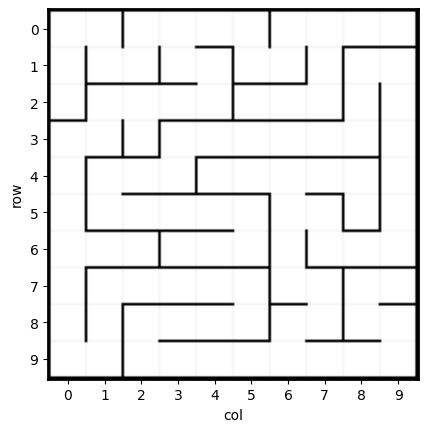

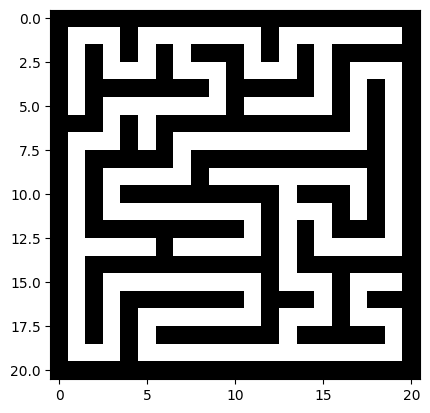

#####################
#   #       #       #
# # # # ### # # #####
# #   #   #   # #   #
# ####### ##### # # #
# #       #     # # #
### # ########### # #
#   # #           # #
# ##### ########### #
# #     #         # #
# # ######### ### # #
# #         #   # # #
# ######### # # ### #
#     #     # #     #
# ########### #######
# #         #   #   #
# # ####### ### # ###
# # #       #   #   #
# # # ####### ##### #
#   #               #
#####################


In [5]:
MazePlot(maze).plot()
plt.show()

plt.imshow(maze.as_pixels())
plt.show()

print(maze.as_ascii())

Note that the adjacency list contains coordinates in `(row, column)` notation. This is the inverse of Cartesian Coordinates `(x, y)` with a horizontal x-axis.

## Solving the maze algorithmically

`LatticeMaze.find_shortest_path` uses the A* algorithm to find the optimal path through the maze.

In [6]:
true_path = maze.find_shortest_path(c_start=(0, 0), c_end=(3, 3))

print(f"{true_path =}")

true_path =array([[0, 0],
       [0, 1],
       [1, 1],
       [1, 2],
       [0, 2],
       [0, 3],
       [1, 3],
       [1, 4],
       [2, 4],
       [2, 3],
       [2, 2],
       [2, 1],
       [3, 1],
       [3, 0],
       [4, 0],
       [5, 0],
       [6, 0],
       [7, 0],
       [8, 0],
       [9, 0],
       [9, 1],
       [8, 1],
       [7, 1],
       [7, 2],
       [7, 3],
       [7, 4],
       [7, 5],
       [8, 5],
       [8, 4],
       [8, 3],
       [8, 2],
       [9, 2],
       [9, 3],
       [9, 4],
       [9, 5],
       [9, 6],
       [8, 6],
       [8, 7],
       [7, 7],
       [7, 6],
       [6, 6],
       [5, 6],
       [5, 7],
       [6, 7],
       [6, 8],
       [6, 9],
       [5, 9],
       [4, 9],
       [3, 9],
       [2, 9],
       [1, 9],
       [1, 8],
       [2, 8],
       [3, 8],
       [3, 7],
       [3, 6],
       [3, 5],
       [3, 4],
       [3, 3]])


We can plot the shortest path with `.add_true_path()`.

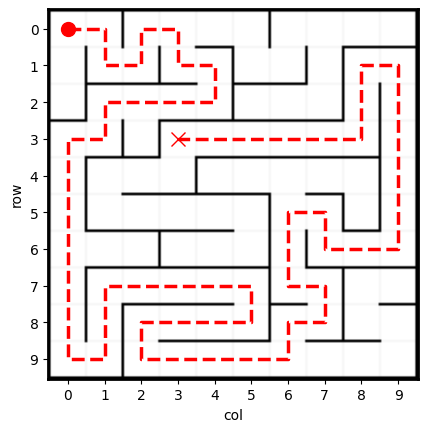

In [7]:
MazePlot(maze).add_true_path(true_path).plot()
plt.show()

## Other Plotting functionality

Displaying one or more predicted paths

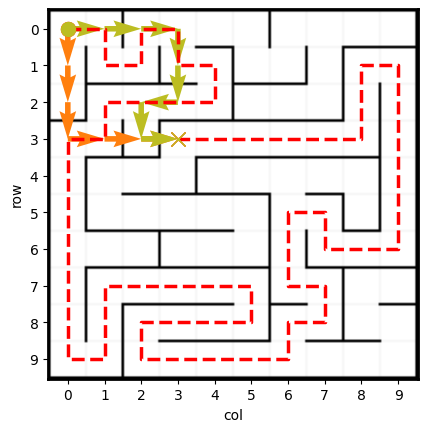

In [8]:
pred_path1 = [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3)]
pred_path2 = [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 2), (3, 2), (3, 3)]
(
    MazePlot(maze)
    .add_true_path(true_path)
    .add_predicted_path(pred_path1)
    .add_predicted_path(pred_path2)
    .plot()
)
plt.show()

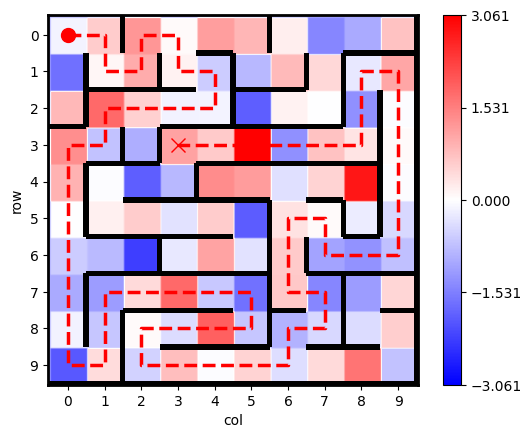

In [9]:
# node_values = np.random.uniform(size=maze.grid_shape)
node_values = np.random.randn(*maze.grid_shape)

MazePlot(maze).add_node_values(node_values, color_map="bwr").add_true_path(
    true_path
).plot()
plt.show()

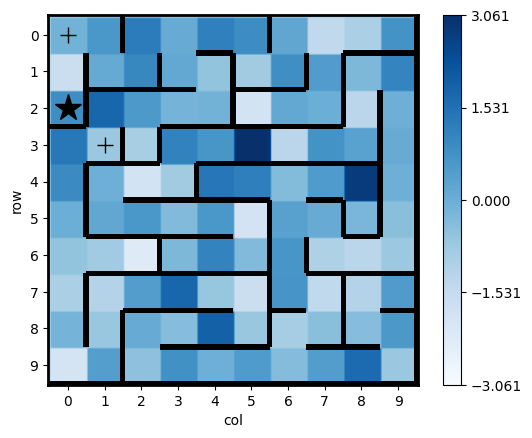

In [10]:
MazePlot(maze).add_node_values(
    node_values,
    color_map="Blues",
    target_token_coord=np.array([2, 0]),
    preceeding_tokens_coords=np.array([[0, 0], [3, 1]]),
).plot()
plt.show()

Alternatively, plotting multiple paths at once is available. Paths must be of type `CoordArray` or `PathFormat`

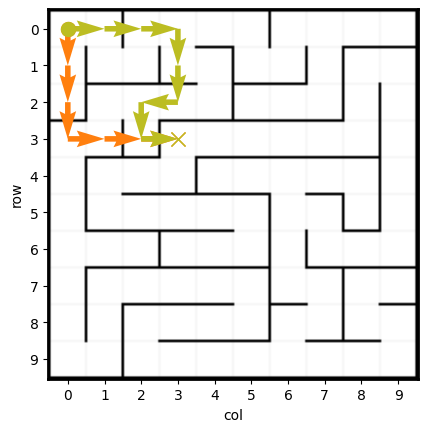

In [11]:
pred_paths = [pred_path1, pred_path2]
MazePlot(maze).add_multiple_paths(pred_paths).plot()
plt.show()

Plotting a maze as a string (e.g. for quick debugging via commandline)

In [12]:
ascii_maze = MazePlot(maze).to_ascii()
print(ascii_maze)

#####################
#   #       #       #
# # # # ### # # #####
# #   #   #   # #   #
# ####### ##### # # #
# #       #     # # #
### # ########### # #
#   # #           # #
# ##### ########### #
# #     #         # #
# # ######### ### # #
# #         #   # # #
# ######### # # ### #
#     #     # #     #
# ########### #######
# #         #   #   #
# # ####### ### # ###
# # #       #   #   #
# # # ####### ##### #
#   #               #
#####################
